## Homework 02-1: due 2024/04/8 23:59 (30%)

#### - In this part, you should calculate the forward pass and backpropagation manually and there is no need for any coding.

#### - Please scan your hand-writting calculation and save it as HW2-1.pdf

#### - You can check your answer and observe how PyTorch do the backpropagation with the following script.

#### - You can change the iterations in script to observe how the loss and the output change.

##### 1. Please do the forward pass and backpropagation with a neural network as below, the __input is 4__ and the __target is 1__. Also, calculate the quadratic loss, 
##### i.e, $$Loss = \frac{1}{2}(y-y^*)^2$$ 
##### Please __update the parameters twice__, i.e., do two back propagation operations, and use the __learning rate 0.01__, __initial weights 1__ , and __initial bias -0.5__.

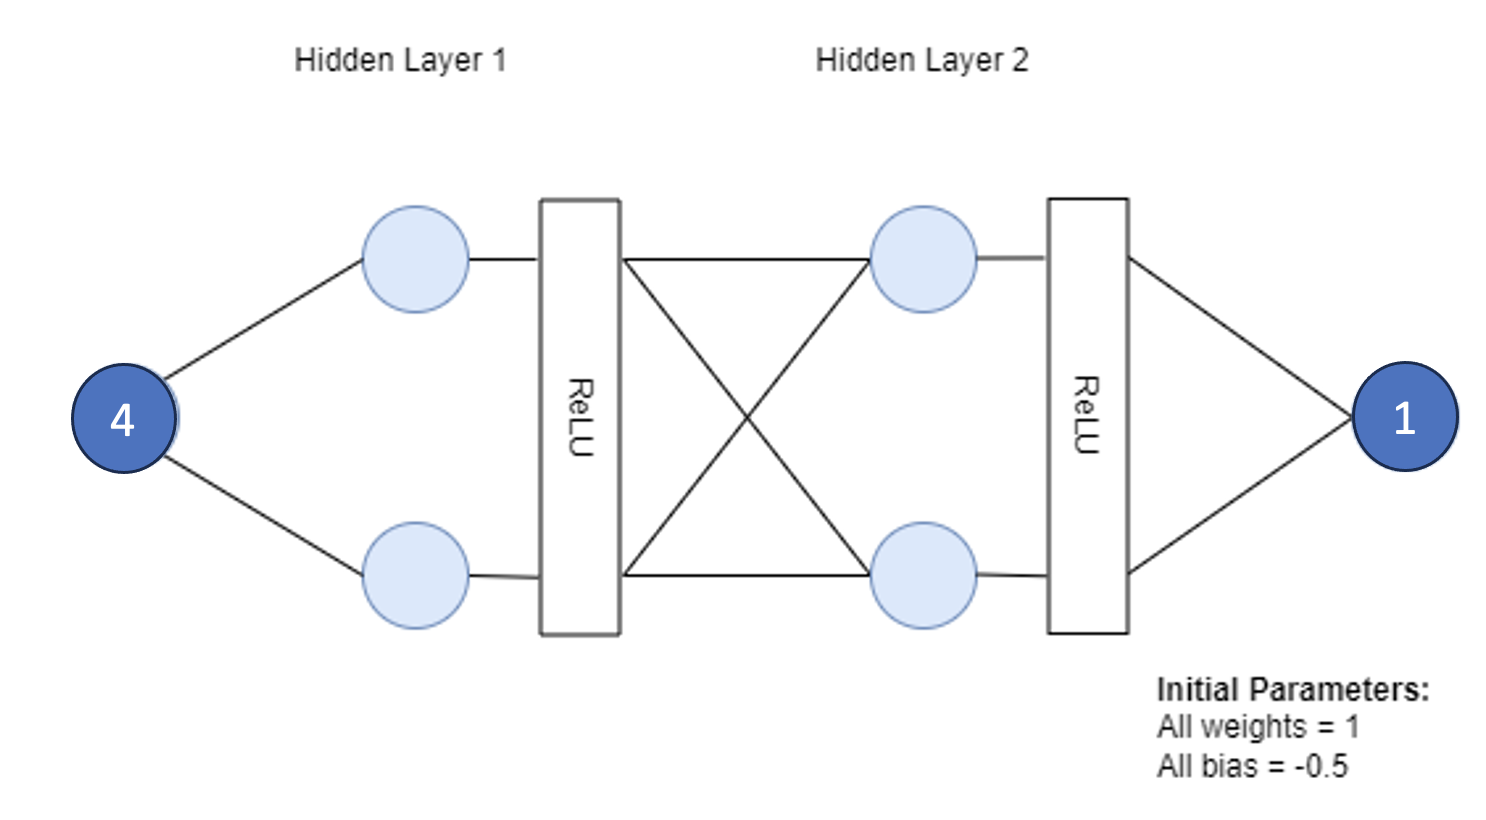

#### Please help me organize the calculation results into a table for scoring purposes. The table presentation is as follows:

**First update - weight**

|           | Layer 1      | Layer 2      | Layer 3      |
|-----------|--------------|--------------|--------------|
| Parameter | value_layer1 | value_layer2 | value_layer3 |
| Gradient  | grad_layer1  | grad_layer2  | grad_layer3  |
| Updated   | update_layer1| update_layer2| update_layer3|

**First update - bias**

|           | Layer 1      | Layer 2      | Layer 3      |
|-----------|--------------|--------------|--------------|
| Parameter | value_layer1 | value_layer2 | value_layer3 |
| Gradient  | grad_layer1  | grad_layer2  | grad_layer3  |
| Updated   | update_layer1| update_layer2| update_layer3|

Please replace `value_layerX`, `grad_layerX`, and `update_layerX` with the actual numerical values for each layer accordingly, the way of presentation is also the same for the second iteration.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict

In [2]:
X = torch.tensor([4], dtype= torch.float32)
y = torch.tensor([1], dtype= torch.float32)

In [3]:
# Half of the sum square error
def loss(y, pred):
    return ((pred-y)**2).sum()/2

In [4]:
# Show parameters
def show_parameters(i, X, model):
    print(f"Iters {i}")
    print("Input:")
    print(X)
    for layer_name, layers in model.named_modules():
        print("-----------------------")
        if not isinstance(layers, nn.Sequential):
            for param_name, param in layers.named_parameters():
                print(f"{layer_name} {param_name} {param}")
                print(f"{layer_name} {param_name} Gradient")
                print(param.grad)
            print(f"{layer_name} output:")
            X = layers(X)
            print(X)
            
    print("===============================================")

In [5]:
def initialize_weights(model):
    for name, i in model.named_modules():
        if isinstance(i, nn.Linear):
            nn.init.constant_(i.weight.data, 1)
            nn.init.constant_(i.bias.data, -0.5)

In [6]:
model = nn.Sequential(OrderedDict([("Layer1", nn.Linear(1, 2)), 
                                   ("ReLU1", nn.ReLU()),
                                   ("Layer2", nn.Linear(2, 2)), 
                                   ("ReLU2", nn.ReLU()),
                                   ("Layer3", nn.Linear(2, 1))]))
initialize_weights(model)
lr = 0.01
n_iters = 2
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0)
loss_list = []
for i in range(n_iters):
    optimizer.zero_grad()
    pred = model(X)
    l = loss(pred, y)
    loss_list.append(l.detach().numpy())
    l.backward()
    show_parameters(i, X, model)
    optimizer.step()

Iters 0
Input:
tensor([4.])
-----------------------
-----------------------
Layer1 weight Parameter containing:
tensor([[1.],
        [1.]], requires_grad=True)
Layer1 weight Gradient
tensor([[92.],
        [92.]])
Layer1 bias Parameter containing:
tensor([-0.5000, -0.5000], requires_grad=True)
Layer1 bias Gradient
tensor([23., 23.])
Layer1 output:
tensor([3.5000, 3.5000], grad_fn=<AddBackward0>)
-----------------------
ReLU1 output:
tensor([3.5000, 3.5000], grad_fn=<ReluBackward0>)
-----------------------
Layer2 weight Parameter containing:
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
Layer2 weight Gradient
tensor([[40.2500, 40.2500],
        [40.2500, 40.2500]])
Layer2 bias Parameter containing:
tensor([-0.5000, -0.5000], requires_grad=True)
Layer2 bias Gradient
tensor([11.5000, 11.5000])
Layer2 output:
tensor([6.5000, 6.5000], grad_fn=<AddBackward0>)
-----------------------
ReLU2 output:
tensor([6.5000, 6.5000], grad_fn=<ReluBackward0>)
-----------------------
Layer3 wei